              Lambda     Slope       MSE       R^2
0                  1  1.943850  1.949939  0.725823
1                 10  1.931119  1.950209  0.725785
2                100  1.812414  1.974016  0.722438
3               1000  1.122450  2.873516  0.595961
4              10000  0.233509  5.947067  0.163796
5  Linear Regression  1.945275  1.949936  0.725824


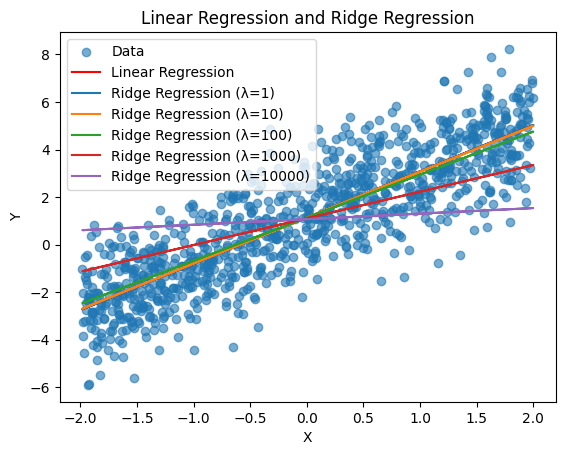

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

import warnings     # filter warning messages
warnings.simplefilter(action="ignore")

np.random.seed(42)
N = 1000
X = np.random.uniform(-2, 2, size=N)

e = np.random.normal(loc=0, scale=np.sqrt(2), size=N)
Y = 1 + 2 * X + e

# Fit linear regression
linear_reg = LinearRegression()
linear_reg.fit(X.reshape(-1, 1), Y)
linear_slope = linear_reg.coef_[0]
linear_mse = mean_squared_error(Y, linear_reg.predict(X.reshape(-1, 1)))
linear_r2 = r2_score(Y, linear_reg.predict(X.reshape(-1, 1)))

# Fit ridge regression for different values of λ
lambda_values = [1, 10, 100, 1000, 10000]
results = []

for lambda_ in lambda_values:
    ridge_reg = Ridge(alpha=lambda_)
    ridge_reg.fit(X.reshape(-1, 1), Y)
    ridge_slope = ridge_reg.coef_[0]
    ridge_mse = mean_squared_error(Y, ridge_reg.predict(X.reshape(-1, 1)))
    ridge_r2 = r2_score(Y, ridge_reg.predict(X.reshape(-1, 1)))
    results.append([lambda_, ridge_slope, ridge_mse, ridge_r2])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Lambda', 'Slope', 'MSE', 'R^2'])

# Add linear regression results to DataFrame
results_df = results_df.append({'Lambda': 'Linear Regression',
                                'Slope': linear_slope,
                                'MSE': linear_mse,
                                'R^2': linear_r2},
                               ignore_index=True)

# Print results
print(results_df)

# Scatter plot of data points
plt.scatter(X, Y, alpha=0.6, label='Data')

# Plot linear regression line
plt.plot(X, linear_reg.predict(X.reshape(-1, 1)), color='red', label='Linear Regression')

# Plot ridge regression lines for different values of λ
for lambda_ in lambda_values:
    ridge_reg = Ridge(alpha=lambda_)
    ridge_reg.fit(X.reshape(-1, 1), Y)
    plt.plot(X, ridge_reg.predict(X.reshape(-1, 1)), label=f'Ridge Regression (λ={lambda_})')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression and Ridge Regression')
plt.legend()
plt.show()